# Logistische Regression ersetzt Perzeptron


## Lernziele

```{admonition} Lernziele
:class: hint
* TODO
```

## Perzeptron ungeeignet bei nicht trennbaren Daten

Das Perzeptron ist ein simples ML-Verfahren für die binäre Klassifikation.
Allerdings ist das Perzeptron nur für trennbare Datensätze ggeignet. Dazu
schauen wir uns zwei Beispiele aus dem Männerfußball an. Ziel der folgenden
Klassifikationsaufgabe ist es, anhand des Marktwertes eines Vereines zu
klassifizieren, ob der Verein in der Bundesliga oder in der 2. Bundesliga
spielt.

Dazu laden wir als erstes den Datensatz `20220801_Marktwert_Bundesliga.csv`
(Download
[csv](https://nextcloud.frankfurt-university.de/s/GESBZzRyXq6dLNC/download);
Quelle: https://www.transfermarkt.de; Stichtag: 01.08.2022).

In [54]:
import pandas as pd
data_raw = pd.read_csv('data/20220801_Marktwert_Bundesliga.csv', skiprows=5, header=0, index_col=0)

Die ersten fünf Einträge lauten wie folgt:

In [55]:
data_raw.head()

,Ligazugehörigkeit,Wert,Kadergröße
Verein,,,
FC Bayern München,Bundesliga,870.23,28
Borussia Dortmund,Bundesliga,509.45,30
Bayer 04 Leverkusen,Bundesliga,455.35,29
RasenBallsport Leipzig,Bundesliga,486.18,30
VfL Wolfsburg,Bundesliga,239.65,33


Die erste Spalte enthält den Vereinsnamen, die zweite Spalte listet die
Ligazugehörigkeit (Bundesliga, 2. Bundesliga oder 3. Liga), die dritte Spalte
beinhaltet den Marktwert des Vereins in Mio. Euro und die vierte Spalte listet
die Anzahl der Spieler.

Zuerst erkunden wie die Daten und lassen uns die Ligazugehörigkeit abhängig vom
Marktwert visualisieren.

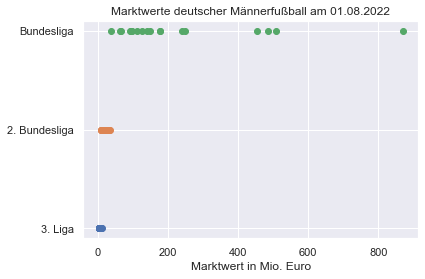

In [56]:
# teile die Datensätze nach Ligazugehörigkeit auf
data_liga1 = data_raw[data_raw['Ligazugehörigkeit'] == 'Bundesliga']
data_liga2 = data_raw[data_raw['Ligazugehörigkeit'] == '2. Bundesliga']
data_liga3 = data_raw[data_raw['Ligazugehörigkeit'] == '3. Liga']

# visualisiere Marktwert --> Ligazugehörigkeit 
import matplotlib.pylab as plt
import seaborn as sns; 
sns.set_theme()

fig, ax = plt.subplots()
ax.scatter(data_liga3['Wert'], data_liga3['Ligazugehörigkeit'])
ax.scatter(data_liga2['Wert'], data_liga2['Ligazugehörigkeit'])
ax.scatter(data_liga1['Wert'], data_liga1['Ligazugehörigkeit'])
ax.set_xlabel('Marktwert in Mio. Euro')
ax.set_title('Marktwerte deutscher Männerfußball am 01.08.2022');


Die Marktwerte der Bundesliga-Vereine sind vereinzelt so hoch, dass die
einzelnen Vereine der 3. Liga als solche kaum erkennbar sind. Wir begrenzen
daher den Marktwert auf 100 Mio. Euro. 

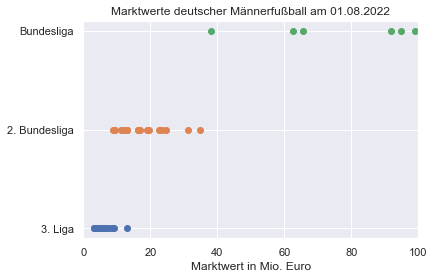

In [57]:
fig, ax = plt.subplots()
ax.scatter(data_liga3['Wert'], data_liga3['Ligazugehörigkeit'])
ax.scatter(data_liga2['Wert'], data_liga2['Ligazugehörigkeit'])
ax.scatter(data_liga1['Wert'], data_liga1['Ligazugehörigkeit'])
ax.set_xlabel('Marktwert in Mio. Euro')
ax.set_title('Marktwerte deutscher Männerfußball am 01.08.2022')
ax.set_xlim([0, 100]);

Wie erkennen, dass ein Marktwert von 36 Mio. Euro die Erstligisten von den
Zweitligisten trennt. Daher wäre auch ein Perzeptron trainierbar. Eine solche
Trennung funktioniert bei den Vereinen der 2. Bundesliga und der 3. Liga nicht.
Wir betrachten nun nur noch 2. und 3. Liga.

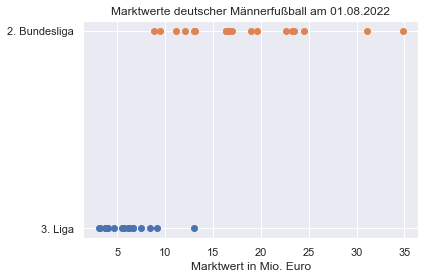

In [58]:
fig, ax = plt.subplots()
ax.scatter(data_liga3['Wert'], data_liga3['Ligazugehörigkeit'])
ax.scatter(data_liga2['Wert'], data_liga2['Ligazugehörigkeit'])
ax.set_xlabel('Marktwert in Mio. Euro')
ax.set_title('Marktwerte deutscher Männerfußball am 01.08.2022');

Anstatt eine Gerade zur Trennung einzuziehen, nehmen wir eine S-förmige
Funktion. Diese S-förmige Funktion intrpretieren wir als Wahrscheinlichkeit der
Ligazugehörigkeit. Die Werte liegen dabei zwischen 0 und 1. Bei einer
Wahrscheinlichkeit von 1 sind wir also 100 % sicher, dass der Verein zur 2.
Bundesliga gehört.

```{figure} pics/bundesliga_decision_function_annotated.pdf
---
width: 600px
name: bundesliga_decision_function.svg
---
Die S-förmige rote Kurve gibt die Wahrscheinlichkeit an, dass ein Verein zur 2. Bundesliga gehört. Da nicht nach einer Wahrscheinlichkeit gefragt ist, sondern nur nach 2. Bundesliga -- ja oder nein -- werden alle Vereine mit einer Wahrscheinlichkeit kleiner 50 % (also 0.5) als Drittligisten klassifiziert.
```

Jetzt brauchen wir eine Funktion für die S-förmige Kurve, das wir dann mittels
eines ML-Verfahrens an unsere Trainingsdaten anpassen können.


## Logistische Funktion ersetzt Heaviside-Funktion

Beim Perzeptron wird auf die gewichtete Summe von Inputs die Heaviside-Funktion
angewandt. So simpel die Heaviside-Funktion auch ist, sie hat einen
entscheidenen Nachteil. Die Heaviside-Funktion ist unstetig, sie springt von
Null auf Eins. Diese Sprungstelle hat die **logistische Funktion** nicht. 

Die logistische Funktion ist defininiert als

$$\phi(z) = \frac{1}{1+e^{-z}}.$$

In der folgenden Abbildung sehen Sie den Funktionsgraphen der logistischen
Funktion.

```{figure} pics/plot_logit_function.pdf
---
width: 600px
name: plot_logit_function
---
Funktionsgraph der logistischen Funktion
```


## Chance für Wahrscheinlichkeiten im Alltag

Im Alltag wird die Wahrscheinlichkeit, dass ein Ereignis eintritt, häufig als eine 
**Chance** angegeben. Beispielsweise sagt eine Person beim
Mensch-ärger-dich-nicht vielleicht: "Meine Chance, eine 6 zu würfeln, ist 1:5."
Seltener wird die Wahrscheinlichkeit eines Ereignisses selbst angegeben, oder
wie oft hört man: "Die Wahrscheinlichkeit, eine 6 zu würfeln, ist 1/6."

Die Chance beschreibt das Verhältnis zwischen der Wahrscheinlichkeit,
dass das Ereignis eintritt, und der Wahrscheinlichkeit, dass das Ereignis nicht
eintritt. Wenn wir die Wahrscheinlichkeit, dass ein Ereignis eintritt, mit $p$
abkürzen, so ist die Wahrscheinlichkeit, dass das Ergeignis nicht eintritt,
gerade $1-p$. Die Formel zur Berechnung einer Chance $R$ lautet also

$$R = \frac{p}{1-p}.$$

Die Wahrscheinlichkeit $p$ ist dabei eine Zahl zwischen Null und Eins, also
$p\in (0,1)$. Dadurch kann die Chancen-Funktion Werte zwischen Null und
Unendlich annehmen, also $R\in (0,\infty)$.

Mehr Details finden Sie bei
[Wikipedia/Chance_(Stochastik)](https://de.wikipedia.org/wiki/Chance_(Stochastik)).